<a href="https://colab.research.google.com/github/bforeman44/FDSfE_BForeman/blob/main/HW7/FDSfE_NLP_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis of Movie Reviews:
## Data - 
the data comes from the Kaggla challenge https://www.kaggle.com/code/yagli18/sentiment-analysis-on-movie-reviews and is comprosed of ~10k movie reviews and associated ratings. 
The challenge there is to create a model that predicts the rating based on the review, which is a Natural Language Processing sentiment analysis task. Sentiment analysis measures the "sentiment" (typically in a positive-to-negative linear scale) of a text. There are many issues with sentiment analysis in genera, and in particulat here, the "sentiment" of the review (negative, which is associated with sad and angry for example) may not match with the judgement on the quality of the movie (which may be sad, but good if it is a drama) 

**We will simply apply a pre-trained model that weights each word in the text to measure its negative-to-positive sentiment and compounds all the words to get an overall sentiment. The right way to do this tho would be to _train_ a new model on the data, learning the match between the sentiment of the words and the rating assigned by the author of the review. That way, the model is _specific_ to this data. This is a challenge that I live for you!**

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os
import json
import pandas as pd
import statistics as st
import numpy as np
import pylab as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [5]:
env = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = env["username"]
os.environ["KAGGLE_KEY"] = env["key"]

In [6]:
!kaggle datasets sentiment

usage: kaggle datasets [-h]
                       {list,files,download,create,version,init,metadata,status}
                       ...
kaggle datasets: error: argument command: invalid choice: 'sentiment' (choose from 'list', 'files', 'download', 'create', 'version', 'init', 'metadata', 'status')


In [7]:
!mkdir sentimentanalysis

mkdir: cannot create directory ‘sentimentanalysis’: File exists


In [8]:
cd sentimentanalysis/

/content/drive/MyDrive/sentimentanalysis


In [9]:
!kaggle competitions download -c sentiment-analysis-on-movie-reviews

sentiment-analysis-on-movie-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
!ls *

sampleSubmission.csv			 test.tsv.zip
sentiment-analysis-on-movie-reviews.zip  train.tsv.zip

sentimentanalysis:
sampleSubmission.csv			 test.tsv.zip
sentiment-analysis-on-movie-reviews.zip  train.tsv.zip


In [11]:
!unzip  sentiment-analysis-on-movie-reviews.zip


Archive:  sentiment-analysis-on-movie-reviews.zip
replace sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sampleSubmission.csv    
replace test.tsv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.tsv.zip            
replace train.tsv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.tsv.zip           


In [12]:
reviews = pd.read_csv('train.tsv.zip',sep='\t')
reviews

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [13]:
reviews = reviews.groupby("SentenceId").first()
reviews

,PhraseId,Phrase,Sentiment
SentenceId,,,
1,1,A series of escapades demonstrating the adage ...,1
2,64,"This quiet , introspective and entertaining in...",4
3,82,"Even fans of Ismail Merchant 's work , I suspe...",1
4,117,A positively thrilling combination of ethnogra...,3
5,157,Aggressive self-glorification and a manipulati...,1
...,...,...,...
8540,155985,... either you 're willing to go with this cla...,2
8541,155998,"Despite these annoyances , the capable Claybur...",2
8542,156022,-LRB- Tries -RRB- to parody a genre that 's al...,1


In [14]:
reviews.shape

(8529, 3)

In [15]:
reviews[["Phrase", "Sentiment"]].values

array([['A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .',
        1],
       ['This quiet , introspective and entertaining independent is worth seeking .',
        4],
       ["Even fans of Ismail Merchant 's work , I suspect , would have a hard time sitting through this one .",
        1],
       ...,
       ["-LRB- Tries -RRB- to parody a genre that 's already a joke in the United States .",
        1],
       ["The movie 's downfall is to substitute plot for personality .",
        1],
       ["The film is darkly atmospheric , with Herrmann quietly suggesting the sadness and obsession beneath Hearst 's forced avuncular chortles .",
        2]], dtype=object)

In [16]:
print('Number of Reviews/Documents: {}'.format(len(reviews)))

print('Corpus Size (words): {}'.format(np.sum([len(phrase.split()) for phrase in reviews['Phrase'].values])))

Number of Reviews/Documents: 8529
Corpus Size (words): 162044


In [17]:
reviews.Sentiment.unique()

array([1, 4, 3, 2, 0])

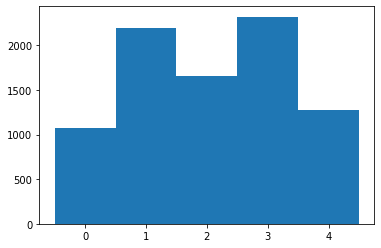

In [18]:
#plot sentiment histogram
plt.hist(reviews.Sentiment, bins=[-0.5,0.5,1.5,2.5,3.5,4.5]);

In [19]:
!pip install stop_words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
from nltk.tokenize import word_tokenize


In [21]:
!python -m nltk.downloader punkt

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
#NLP packs
import nltk
from nltk.tokenize import word_tokenize
#from nltk.corpus import stopwords
from stop_words import get_stop_words
#from textblob import TextBlob , Word
#import re 
#import string

In [23]:
#remove some characters like new line from the strings
reviews['Phrase'] = reviews['Phrase'].str.lower(
    ).str.replace(
        '[^\w\s]', '').str.replace(
            '\d+', '').str.replace(
                '\n',' ').replace(
                        '\r','').str.replace(
                            "[^a-zA-Z0-9\s]",'') 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  


# lets talk about the lambda construct and apply

In [24]:
reviews['Phrase'] = reviews['Phrase'].apply(lambda x: word_tokenize(x)) # sentence -> words
reviews['Phrase']

SentenceId
1       [a, series, of, escapades, demonstrating, the,...
2       [this, quiet, introspective, and, entertaining...
3       [even, fans, of, ismail, merchant, s, work, i,...
4       [a, positively, thrilling, combination, of, et...
5       [aggressive, selfglorification, and, a, manipu...
                              ...                        
8540    [either, you, re, willing, to, go, with, this,...
8541    [despite, these, annoyances, the, capable, cla...
8542    [lrb, tries, rrb, to, parody, a, genre, that, ...
8543    [the, movie, s, downfall, is, to, substitute, ...
8544    [the, film, is, darkly, atmospheric, with, her...
Name: Phrase, Length: 8529, dtype: object

# lets talk about stop words... and list comprehensions

In [25]:
from wordcloud import WordCloud, STOPWORDS
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [26]:
reviews["Phrase"] = reviews["Phrase"].apply(lambda x:
                                [word for word in x if word not in STOPWORDS]) # stop words removal


In [27]:
reviews["Phrase"]

SentenceId
1       [series, escapades, demonstrating, adage, good...
2       [quiet, introspective, entertaining, independe...
3       [even, fans, ismail, merchant, s, work, suspec...
4       [positively, thrilling, combination, ethnograp...
5       [aggressive, selfglorification, manipulative, ...
                              ...                        
8540    [either, re, willing, go, claustrophobic, conc...
8541    [despite, annoyances, capable, clayburgh, tamb...
8542    [lrb, tries, rrb, parody, genre, s, already, j...
8543    [movie, s, downfall, substitute, plot, persona...
8544    [film, darkly, atmospheric, herrmann, quietly,...
Name: Phrase, Length: 8529, dtype: object

# Frequency of words

In [28]:
nltk.FreqDist(reviews.Phrase.sum()).most_common(10)

[('s', 2558),
 ('film', 1150),
 ('movie', 969),
 ('nt', 680),
 ('one', 553),
 ('rrb', 352),
 ('lrb', 351),
 ('story', 347),
 ('will', 265),
 ('good', 264)]

In [29]:
#reviews["Phrase"] = reviews["Phrase"].apply(lambda x : 
#                  [word for word in x if word not in 
#                   ["s", "nt", "rrb", "lrb", "one"]]) # more "stop" words 
# or I could do it by length: are there gpoing to be key words that are <4 characters??
reviews["Phrase"] = reviews["Phrase"].apply(lambda x : 
                  [word for word in x if len(word)>3]) # more "stop" words 


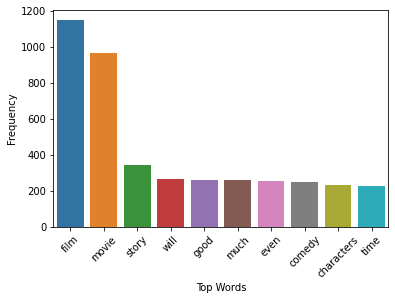

In [30]:
words_freq = pd.DataFrame(nltk.FreqDist(reviews.Phrase.sum(
                                          )).most_common(10), 
                          columns=['Top Words', 'Frequency'])
ax = sns.barplot(x="Top Words",y="Frequency",data=words_freq)
plt.xticks(rotation = 45); # Rotates X-Axis Ticks by 45-degrees


# Lets talk about the str.join() method

In [31]:
def wc(data,bgcolor): # word cloud
    plt.figure(figsize=(10,10))
    wc = WordCloud(background_color=bgcolor, max_words=100, 
                 min_word_length=4, contour_width=3, 
                 contour_color='steelblue')
    wc.generate(" ".join(data)) # tum kelimeleri birlestirip tek 1 string haline getirir
    plt.imshow(wc)
    plt.axis("off")



#TASK 1 : 
Use the function above to plot the word cloud **for Sentiment==0**, comment on the plot to describe how a wordcloud should be read and what are interesting words that appear

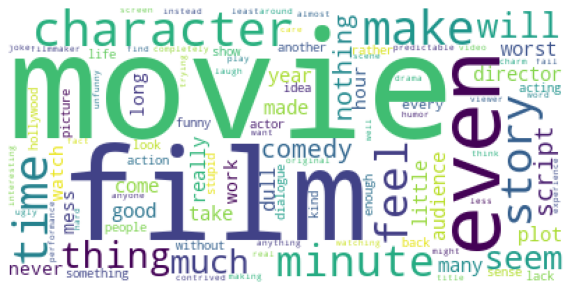

In [32]:
# your code here
#plot the word cloud for sentiment 0
wc(reviews[reviews['Sentiment'] == 0]["Phrase"].sum(), bgcolor = 'white')

The word cloud should be read starting from the biggest letters down to the smallest because the bigger words were used the most in the reviews and the smaller words were used the least. The words that are the most interesting are film, movie, character, and time because they are the biggest words.

#TASK 2 : 
Use the function above to plot the word cloud **for Sentiment==4**, comment on the plot to describe how a wordcloud should be read and what are interesting words that appear. How does it differ from Sentiment==0?

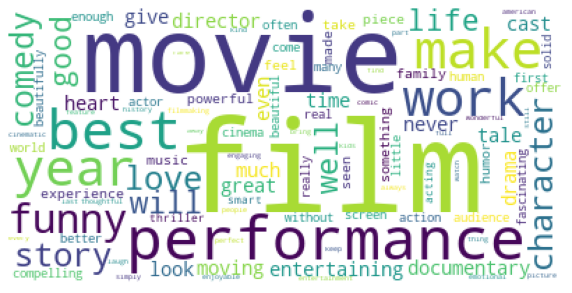

In [33]:
# your code here
#plot the word cloud for sentiment 4
wc(reviews[reviews['Sentiment'] == 4]["Phrase"].sum(), bgcolor = 'white')

Just like with sentiment == 0  this word cloud should be read starting from the biggest letters down to the smallest because the bigger words were used the most in the reviews and the smaller words were used the least. The words that are the most interesting are film, movie, performance, and best because again they are the biggest words. This word cloud differs however because even though there are similar words they are of different sizes and in different areas of the word cloud which shows that words were used at differing amounts of times in this sequence.

# Task 3: sentiment analysis

install a package that contains a pretrained model: this model will score every word in a sentence as positive or negative (with a continuous score from -1 to 1) and will then average over those words.

In [34]:
!pip install vaderSentiment


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#remember to move this cell to the top: all imports should be in the top cell (as well as installs)

In [36]:
#create a model
sid_obj = SentimentIntensityAnalyzer() 
#apply the model to a string
sid_obj.polarity_scores("series escapades demonstrating adage good goose good gander occasionally amuses none amounts much story")
 

{'neg': 0.0, 'neu': 0.573, 'pos': 0.427, 'compound': 0.8024}

In [37]:
#define a function to generate the senriment given a string
def sentiment_vader(words):
  sid_obj = SentimentIntensityAnalyzer()
  sentiment_dict = sid_obj.polarity_scores(' '.join(words))
  return sentiment_dict['compound']


## TASK steps: 
1. take the review for each Sentiment column value (you can use Sentiment==0, Sentiment==1..... like you should have done for the wordclouds) 
2. for each Sentiment group calculate the sentiment of each Phrase, the mean sentiment across the Phrases, and the standard deviation over this mean
3. plot on the x axis the value of the Sentiment column [0, 1, 2, 3, 4]
4. plot on the y axis the _mean_ sentiment as measured by your code for all reviews with that Sentiment value in the dataset
5. include the errorbar on the measured sentiment (use plt.errorbar to do this)
6. Comment on the figure: what do you see? is the model good?

### hint: you may want to use a list comprehension to do this! the steps are not necessarily sequential: everything can be done with a single line of code. This is not required however

In [38]:
list0=[]
s0 = reviews[reviews['Sentiment'] == 0]['Phrase']
for i in s0 :
    print(sentiment_vader(i))
    list0.append(sentiment_vader(i))

0.0
-0.7351
-0.1027
0.4215
0.0258
0.0
-0.836
0.2516
0.4404
-0.7096
0.0516
-0.1779
0.0516
0.25
0.5037
-0.5256
-0.836
-0.5994
-0.6597
0.7096
0.7351
0.4404
-0.3384
-0.3612
0.0258
-0.1531
0.0
-0.296
-0.2732
-0.0516
-0.4019
-0.4215
0.0
-0.34
-0.4588
-0.5842
0.0
0.0
-0.4588
-0.5267
-0.3612
0.9169
0.3519
0.5106
-0.3612
-0.4767
0.2023
-0.1027
-0.4588
-0.4588
-0.5256
-0.4215
-0.5267
-0.1779
0.6369
-0.5994
0.0
-0.3612
0.34
-0.5994
-0.0516
-0.6249
0.0
-0.1779
0.296
-0.4019
-0.34
0.0
-0.7425
-0.0422
0.0
0.0
-0.3182
0.2411
-0.5859
0.2732
0.0
0.0
-0.6249
0.0
0.0
0.6249
0.0
0.0
0.2411
-0.3182
0.0
0.5106
0.0
-0.2732
-0.8074
-0.2856
0.3887
-0.7184
-0.3182
-0.5106
0.34
-0.34
0.3818
0.3612
-0.3976
0.5719
-0.4939
0.0
-0.0258
-0.4767
0.7845
-0.7801
-0.5551
-0.0516
0.5719
-0.25
-0.3182
-0.25
-0.4767
-0.6908
0.0258
0.4019
-0.3182
-0.5106
0.0
-0.5106
0.0
-0.0516
0.296
0.0
0.4019
-0.128
0.3818
0.6249
0.0258
0.0
0.2263
-0.4939
-0.6249
-0.6908
-0.4019
-0.5267
-0.25
-0.4215
-0.5423
0.0
0.7096
0.2732
0.0
-0.4767
0

In [39]:
m0 = st.mean(list0)
print("The mean of the phrases of sentiment rating 0 is {0:.3f}".format(m0))

The mean of the phrases of sentiment rating 0 is -0.101


In [40]:
print("The standard deviation of the phrases of sentiment rating 0 is {0:.3f}".format(np.std(list0)))

The standard deviation of the phrases of sentiment rating 0 is 0.434


In [41]:
list1=[]
s1 = reviews[reviews['Sentiment'] == 1]['Phrase']
for i in s1 :
    print(sentiment_vader(i))
    list1.append(sentiment_vader(i))

0.8024
-0.3818
-0.128
-0.6369
-0.0516
-0.5719
-0.1513
0.5719
0.0
0.4019
0.9007
0.0
-0.5574
0.7867
0.0
0.4019
0.5719
-0.5267
-0.5859
0.0
0.2732
0.25
0.0
-0.7264
0.5423
0.0
-0.3818
0.6486
0.6249
0.5423
0.0258
0.5767
0.7096
0.4019
-0.25
0.0
0.8126
0.4215
0.0
0.4588
-0.2944
0.25
0.0
-0.5106
-0.743
0.0
-0.5719
0.4588
-0.25
-0.6285
-0.3182
-0.4588
0.6249
-0.1877
0.0
-0.4939
0.4019
0.6124
0.0038
0.0736
0.0
0.0
0.6369
0.4588
-0.5719
0.8442
0.0
0.6369
0.0
0.0
-0.6705
-0.3818
0.7203
0.2732
-0.6808
0.6369
0.5106
0.0624
-0.079
0.0258
0.049
-0.5859
0.1531
0.7579
0.296
0.0
0.0
-0.0516
0.0
-0.8689
0.0
-0.0976
0.0258
0.0
0.4588
0.6124
0.2732
0.7003
0.0
-0.4404
0.0
-0.1027
-0.3818
-0.1779
-0.25
0.0
0.5267
0.7506
-0.25
0.4588
-0.3089
0.25
-0.4404
0.25
0.7579
-0.0772
0.3182
-0.7845
0.0
-0.6908
0.0
0.0
0.0516
-0.5267
0.0
-0.0035
0.4588
0.7964
-0.4215
0.4588
0.0
0.1531
0.4404
-0.5719
-0.2023
0.0
0.0
0.2263
0.0
0.802
0.1779
0.0516
0.4019
-0.4144
0.3612
0.853
0.0
-0.1531
-0.6519
-0.4767
0.0
0.0772
0.6124
0.2

In [42]:
m1 = st.mean(list1)
print("The mean of the phrases of sentiment rating 1 is {0:.3f}".format(m1))

The mean of the phrases of sentiment rating 1 is 0.046


In [43]:
print("The standard deviation of the phrases of sentiment rating 1 is {0:.3f}".format(np.std(list1)))

The standard deviation of the phrases of sentiment rating 1 is 0.418


In [44]:
list2=[]
s2 = reviews[reviews['Sentiment'] == 2]['Phrase']
for i in s2 :
    print(sentiment_vader(i))
    list2.append(sentiment_vader(i))

0.8369
0.0
0.4404
0.6369
0.0
0.4019
0.4588
0.0
0.0
0.0
0.5719
0.0
0.5106
0.0
-0.128
0.1531
-0.5994
0.4927
0.0
-0.8555
0.296
0.5423
0.0
0.0
0.0
0.5859
0.6124
-0.8442
-0.7579
0.2263
0.8316
0.875
0.0
0.7783
0.0
0.0
0.3612
0.0
0.3818
0.0
0.4019
-0.1779
0.0
0.0
0.0
-0.0772
-0.6412
-0.2732
0.0
0.0
0.0
0.3711
0.5267
0.0
0.0
0.1779
-0.3182
0.0772
0.0
0.1027
0.0
0.4215
0.0
0.296
0.0
-0.3612
0.8979
0.0
0.0
0.6369
-0.4215
0.0
0.2732
-0.6908
-0.5965
-0.1027
0.802
0.0
-0.7425
0.6369
-0.6597
0.0
0.4588
0.0
0.5574
0.0
0.6637
-0.0772
0.6369
0.0
0.2023
0.2732
-0.7184
-0.34
0.6249
0.4404
0.4939
0.0
0.0
0.0
-0.5859
0.0
0.4404
0.4404
-0.5267
-0.0258
0.0
0.4404
-0.0534
-0.3818
0.0
0.0
-0.2023
0.0
0.0772
0.0516
0.0
0.3182
0.0
0.1027
0.4404
0.4019
0.0
0.0
0.6124
-0.765
0.4927
0.0
0.0
0.0
0.428
-0.1779
0.5106
0.2263
0.296
0.5994
0.6369
0.8658
-0.296
0.3612
0.8555
0.3182
0.8271
0.6705
0.5267
-0.3182
0.0
0.0
0.25
-0.0516
0.0
0.0
0.128
0.4767
0.8176
0.0
0.6249
0.0
0.296
0.8316
0.0
0.5423
0.0
0.0
0.4767
0.0
-0.47

In [45]:
m2 = st.mean(list2)
print("The mean of the phrases of sentiment rating 2 is {0:.3f}".format(m2))

The mean of the phrases of sentiment rating 2 is 0.118


In [46]:
print("The standard deviation of the phrases of sentiment rating 2 is {0:.3f}".format(np.std(list2)))

The standard deviation of the phrases of sentiment rating 2 is 0.409


In [47]:
list3=[]
s3 = reviews[reviews['Sentiment'] == 3]['Phrase']
for i in s3 :
    print(sentiment_vader(i))
    list3.append(sentiment_vader(i))

-0.886
0.7783
0.3182
0.0772
0.9022
0.7269
0.0
0.0
0.4404
-0.3818
-0.5279
0.34
0.6808
0.1779
0.3182
0.0
0.0
0.7744
0.6369
0.0258
0.6486
0.0
0.8591
0.3182
-0.5719
0.0
0.4939
0.0
0.4215
0.0
0.3612
0.1779
0.743
0.2718
-0.6124
0.8979
0.7845
0.5423
0.8225
0.0
0.7184
0.0
0.3182
0.835
0.7717
0.2755
0.7717
0.8519
0.7351
-0.4019
0.4404
0.7269
0.0
0.4404
0.0
-0.6705
0.3182
0.7351
-0.1027
0.0
0.765
0.7506
0.6369
0.7579
0.4019
0.3612
-0.3818
0.0516
0.8074
0.8316
0.8442
-0.8442
0.0
-0.1027
0.0
0.8316
0.4404
0.2263
0.6369
0.5719
0.4033
0.4404
0.6124
0.6908
0.5859
0.743
-0.3197
0.5106
0.0
0.5719
0.4588
0.0
-0.25
0.4767
0.5994
0.5859
0.3818
0.3724
0.5423
0.8934
0.5994
0.0
0.5106
0.7351
0.0
0.5574
0.4019
0.5859
0.0
0.0
-0.0772
0.9186
0.3818
-0.1531
0.4404
-0.4023
0.9001
0.4404
0.0
0.4939
0.4404
0.3832
0.2732
-0.4588
0.6369
0.7089
0.5994
0.7783
-0.3832
0.5719
0.2732
0.0
0.0
-0.296
0.8625
-0.0772
0.8342
0.296
-0.5719
0.6249
0.926
0.1027
0.5719
0.0
0.0
0.5106
-0.3612
0.6249
-0.6705
0.7096
0.891
0.7351
0.22

In [48]:
m3 = st.mean(list3)
print("The mean of the phrases of sentiment rating 3 is {0:.3f}".format(m3))

The mean of the phrases of sentiment rating 3 is 0.294


In [49]:
print("The standard deviation of the phrases of sentiment rating 3 is {0:.3f}".format(np.std(list3)))

The standard deviation of the phrases of sentiment rating 3 is 0.413


In [50]:
list4=[]
s4 = reviews[reviews['Sentiment'] == 4]['Phrase']
for i in s4 :
    print(sentiment_vader(i))
    list4.append(sentiment_vader(i))

0.5859
-0.34
0.0
0.6369
-0.7717
0.34
0.4019
0.0
0.0
-0.7096
0.4767
0.6597
0.8643
0.5719
0.4767
0.3818
0.5106
0.0
0.9081
0.8481
0.2732
0.0516
0.0
-0.1779
0.0
0.8225
-0.0516
-0.2263
0.6124
0.836
0.0
0.9524
0.6486
0.9081
-0.2263
0.6705
0.6666
0.9117
0.4215
0.0
-0.0516
0.8442
0.2094
-0.3612
0.0258
0.4404
0.5994
0.6124
0.0
0.6369
0.0
-0.6447
0.0
0.128
-0.681
0.5106
-0.34
0.1779
0.8316
0.5106
0.0
0.4588
0.0
0.3818
0.5994
0.7147
0.5563
0.5994
0.7269
0.7783
0.5106
0.6249
0.4588
0.6808
0.2732
0.0
0.25
0.7096
0.8036
0.8271
0.891
0.7906
-0.4404
0.0
0.8225
0.4404
0.6249
0.8689
0.3182
0.3818
0.5423
0.8555
0.0
0.8225
0.8689
0.9186
0.5994
0.0
0.3818
0.5994
0.7346
-0.2263
0.34
0.4404
0.886
0.6705
0.7559
0.6369
0.9327
0.5106
0.7506
0.1779
0.8555
0.934
0.0
0.6369
0.0
0.7579
0.6369
0.9022
0.9136
-0.4404
0.6249
0.3612
0.4588
0.0
0.8625
0.6808
0.891
0.4404
0.4215
0.0
0.4215
0.5859
0.2626
0.0
-0.34
0.6249
0.0
0.25
0.7184
0.9041
0.6124
0.8979
0.0
0.5574
0.8402
0.91
0.9022
0.0
0.6969
0.0
0.9501
0.5994
0.9217


In [51]:
m4 = st.mean(list4)
print("The mean of the phrases of sentiment rating 4 is {0:.3f}".format(m4))

The mean of the phrases of sentiment rating 4 is 0.432


In [52]:
print("The standard deviation of the phrases of sentiment rating 4 is {0:.3f}".format(np.std(list4)))

The standard deviation of the phrases of sentiment rating 4 is 0.387


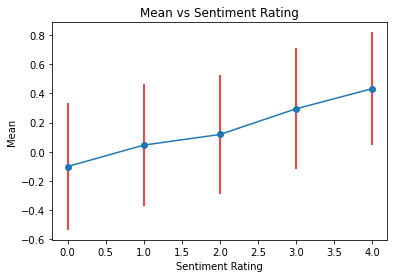

In [54]:
import matplotlib.pyplot as plt
  
x = [0,1,2,3,4]
y = [m0,m1,m2,m3,m4]
  
plt.plot(x, y)
plt.xlabel('Sentiment Rating')
plt.ylabel('Mean')
plt.title('Mean vs Sentiment Rating')
plt.errorbar(x, y, yerr=[np.std(list0), np.std(list1), np.std(list2), np.std(list3), np.std(list4)],ecolor='Red', fmt='o')
plt.show()

I see that as the sentiment rating increases so does the mean of the sentiment of the phrase indicating that the higher the rating the higher the overall sentimental values for the phrases in the reviews